In [1]:
# For downloading data
import sxs
from sxs import zenodo as zen
from matplotlib import rc

# For interacting with the data
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import json

rc('text', usetex=True)

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


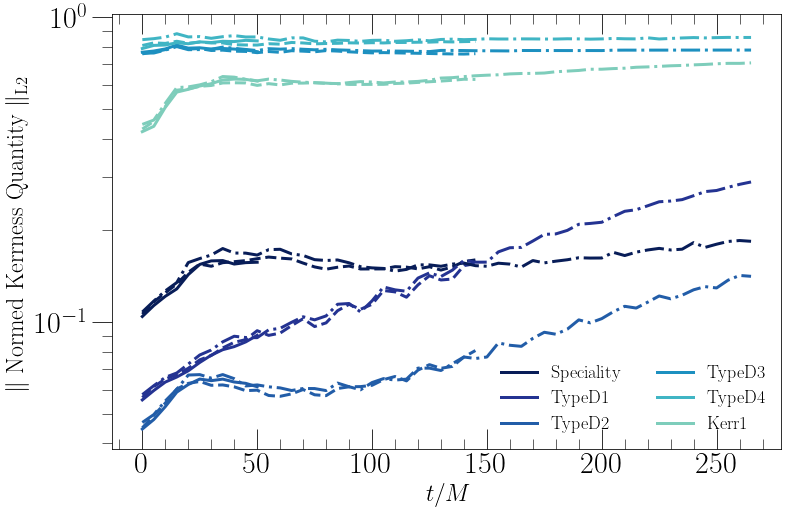

In [23]:
def PlotValues():
    
    plt.figure(figsize=(12, 8))
        
    def ReadValues(l):
        p = "/Users/mokounkova/KerrnessBinaries/Data/Orbital_NewNorm"
        f = p + "/JoinedLev" + l + "/Values.dat"
        time, s, d1, d2, d3, d4, k = np.loadtxt(f, comments="#",usecols=(range(7)),unpack=True)
        return time, s, d1, d2, d3, d4, k
    
    def PlotValues(l, ls):
        t, s, d1, d2, d3, d4, k = ReadValues(l)
        cmap = matplotlib.cm.get_cmap('YlGnBu')
        colors = [cmap((float(i) + 1)/8) for i in range(8)][::-1]
        labels = ['Speciality', 'TypeD1', 'TypeD2', 'TypeD3', 'TypeD4', 'Kerr1']
        quants = [s, d1, d2, d3, d4, k]
        for q, c, lab in zip(quants, colors, labels):
            plt.plot(t, q, color = c, ls = ls, label = lab if ls == '-' else '')

    
    PlotValues('2', '-')
    PlotValues('1', '--')
    PlotValues('0', '-.')
    
    plt.yscale('log')
    plt.legend(frameon=False, ncol = 2)
    plt.ylabel('$\|$ Normed Kerrness Quantity $\|_\mathrm{L2}$')
    plt.xlabel(r'$t/M$')
    plt.savefig('DomainNorms.pdf')
    plt.show()
    

PlotValues()

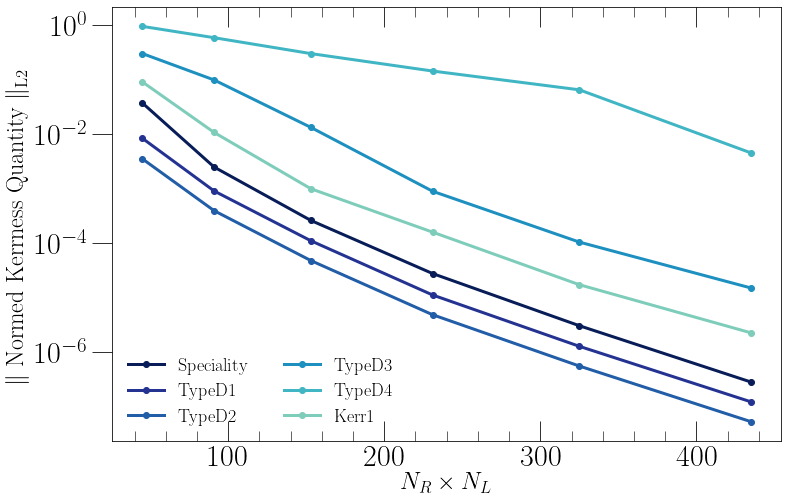

In [30]:
def PlotConvergence():
    
    plt.figure(figsize=(12, 8))

    def ReadValue(col):
        p = "/Users/mokounkova/KerrnessBinaries/Data/SingleBH/"
        f = p + "QuantitiesNormed.dat"
        val = np.loadtxt(f, comments="#",usecols=([col]),unpack=True)
        return val
    
    def PlotValues():
        res = [(9 + 4*k)*(5 + 2*k) for k in range(6)]
        cmap = matplotlib.cm.get_cmap('YlGnBu')
        colors = [cmap((float(i) + 1)/8) for i in range(8)][::-1]
        labels = ['Speciality', 'TypeD1', 'TypeD2', 'TypeD3', 'TypeD4', 'Kerr1']
        cols = [1, 2, 3, 4, 5, 6]
        for col, c, lab in zip(cols, colors, labels):
            val = ReadValue(col)
            plt.plot(res, val,'-o', color = c, label = lab)

    
    PlotValues()
    
    plt.yscale('log')
    plt.legend(frameon=False, ncol = 2)
    plt.ylabel('$\|$ Normed Kerrness Quantity $\|_\mathrm{L2}$')
    plt.xlabel(r'$N_R \times N_L$')
    plt.savefig('Convergence.pdf')
    plt.show()
    

PlotConvergence()